In [5]:
import tensorflow as tf 

In [7]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [10]:
%store -r X_train
%store -r y_train
%store -r X_val
%store -r y_val

#these are all stored from the notebook cnn_classification.ipynb, to make sure that training and parameter tuning are implemented on the exact same data

The model previously found through gridsearch slightly overfits the training data. In order to address this issue, some hyperameter tuning regarding the dropout rate and the learning rate is performed here.

First attempt: learning rate stays 0.001 but callback function is introduced

In [9]:

model = Sequential()

# Convolutional layers
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(1, 219)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

# Output layer with 6 units for classification
model.add(Dense(4, activation='softmax'))

# Create an optimizer with an initial learning rate
optimizer = Adam(learning_rate=0.001)

# Use ReduceLROnPlateau callback to adjust learning rate during training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_1          │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 513,540 (1.96 MB)

 Trainable params: 513,540 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    verbose=1)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.3279 - loss: 1.3828 - val_accuracy: 0.4585 - val_loss: 1.3455
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4352 - loss: 1.3558 - val_accuracy: 0.3736 - val_loss: 1.3293
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4465 - loss: 1.3380 - val_accuracy: 0.4296 - val_loss: 1.3240
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4481 - loss: 1.3367 - val_accuracy: 0.4422 - val_loss: 1.3323
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4325 - loss: 1.3387 - val_accuracy: 0.4188 - val_loss: 1.3398
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4757 - loss: 1.3206 - val_accuracy: 0.4278 - val_loss: 1.3439
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4483 - loss: 1.3299 - val_accuracy: 0.4531 - val_loss: 1.3389
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4850 - loss: 1.3190 - val_accuracy: 0.4621 - v

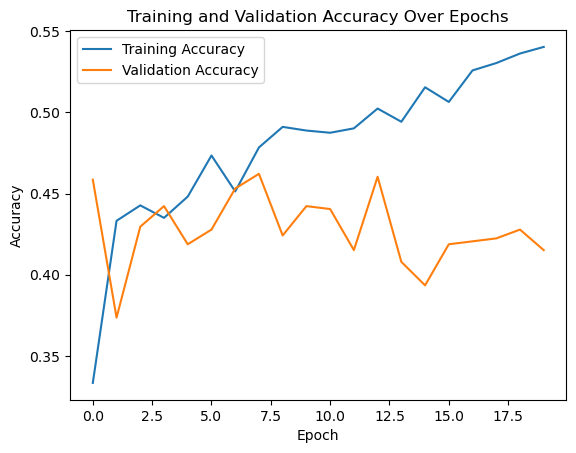

In [12]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy 
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

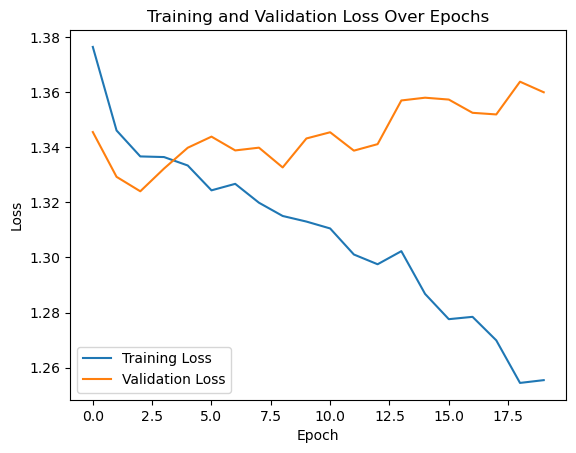

In [13]:
# Plot training and validation loss 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

second attempt: higher learning rate

In [14]:
model = Sequential()

# Convolutional layers
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(1, 219)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

# Output layer with 6 units for classification
model.add(Dense(4, activation='softmax'))

# Create an optimizer with an initial learning rate
optimizer = Adam(learning_rate=0.005)

# Use ReduceLROnPlateau callback to adjust learning rate during training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_6 (Conv1D)               │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_2          │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_4 (Dropout)             │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 513,540 (1.96 MB)

 Trainable params: 513,540 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    verbose=1)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.3058 - loss: 1.3836 - val_accuracy: 0.3664 - val_loss: 1.3431
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4380 - loss: 1.3426 - val_accuracy: 0.4801 - val_loss: 1.3397
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4161 - loss: 1.3395 - val_accuracy: 0.4711 - val_loss: 1.3411
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4646 - loss: 1.3251 - val_accuracy: 0.4242 - val_loss: 1.3256
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4455 - loss: 1.3344 - val_accuracy: 0.4152 - val_loss: 1.3248
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4766 - loss: 1.3255 - val_accuracy: 0.4278 - val_loss: 1.3266
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4585 - loss: 1.3243 - val_accuracy: 0.4639 - val_loss: 1.3382
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5173 - loss: 1.3131 - val_accuracy: 0.4188 - v

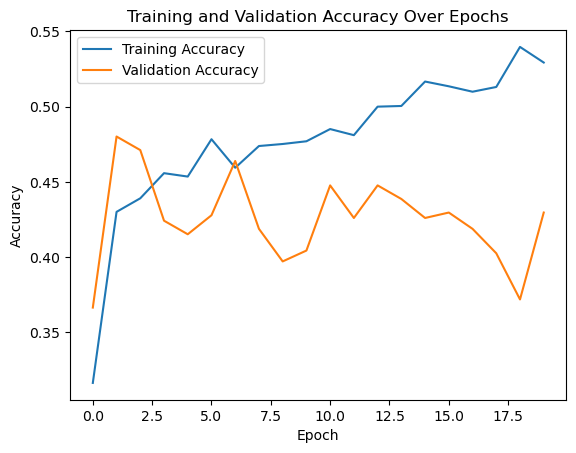

In [16]:
# Plot training and validation accuracy 
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

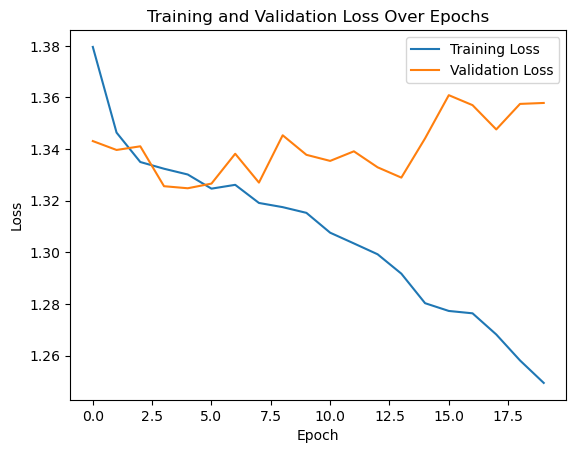

In [17]:
# Plot training and validation loss 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

third attempt: higher dropout rate and smaller learning rate

In [27]:
model = Sequential()

# Convolutional layers
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(1, 219)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))

# Output layer with 6 units for classification
model.add(Dense(4, activation='softmax'))

# Create an optimizer with an initial learning rate
optimizer = Adam(learning_rate=0.0001)

# Use ReduceLROnPlateau callback to adjust learning rate during training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_11 (Conv1D)              │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_12 (Conv1D)              │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_4          │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_11 (Dense)                │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_7 (Dropout)             │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_12 (Dense)                │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_8 (Dropout)             │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_13 (Dense)                │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 513,540 (1.96 MB)

 Trainable params: 513,540 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    verbose=1)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.2490 - loss: 1.3855 - val_accuracy: 0.2888 - val_loss: 1.3797
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3367 - loss: 1.3818 - val_accuracy: 0.2852 - val_loss: 1.3647
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3687 - loss: 1.3621 - val_accuracy: 0.4585 - val_loss: 1.3375
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4431 - loss: 1.3501 - val_accuracy: 0.4242 - val_loss: 1.3242
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4831 - loss: 1.3392 - val_accuracy: 0.4242 - val_loss: 1.3289
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4597 - loss: 1.3336 - val_accuracy: 0.3827 - val_loss: 1.3341
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4378 - loss: 1.3433 - val_accuracy: 0.4224 - val_loss: 1.3356
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4576 - loss: 1.3368 - val_accuracy: 0.4224 - v

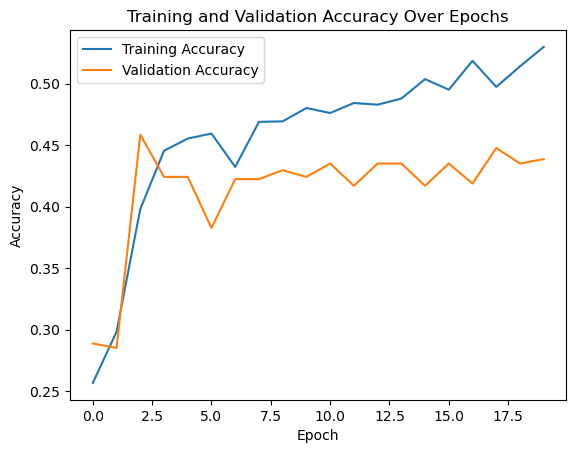

In [29]:
# Plot training and validation accuracy 
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

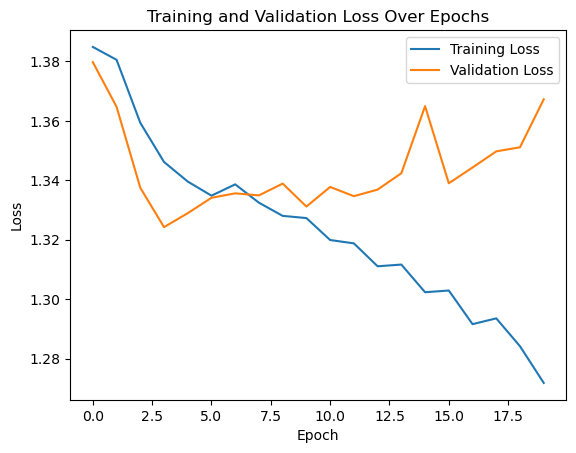

In [30]:
# Plot training and validation loss 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

The third model provides the best result in terms of tradeoff between a good accuracy score and a small difference between training and validation accuracy. Also, validation accuracy and validation loss follow a similar pattern with a big improvement within the first 5 epochs and a sort of settlement during the remaining epochs.

EVALUATION ON THE TEST SET in the notebook cnn_evaluation.ipynb